## Exploratory Analysis for Jewelry_Type = 'Earrings'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan
import json
import re
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
filename = '/Users/rupalgandhre/SpringBoard/DataScience_Capstone2/data/raw/effy_clean_split_data.csv'
df = pd.read_csv(filename )

In [4]:
df['Jewelry_Type'].value_counts()

Rings                   1104
Necklace and Pendant     690
Earrings                 413
Bracelets                234
Name: Jewelry_Type, dtype: int64

In [5]:
df[df['Jewelry_Type']=='Earrings'].describe()

,Discount_Price,Price,Product_Carat,Stone1_Carat,Stone2_Carat,Stone3_Carat,Stone4_Carat,Stone5_Carat,Stone6_Carat
count,413.000000,413.000000,413.000000,413.000000,217.000000,10.000000,0.0,0.0,0.0
mean,2132.498789,3338.341404,2.400678,2.211961,0.422212,2.067000,NaN,NaN,NaN
std,1617.853279,2636.150169,3.421196,3.367893,0.729534,3.357172,NaN,NaN,NaN
min,136.500000,195.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,906.500000,1450.000000,0.620000,0.510000,0.100000,0.062500,NaN,NaN,NaN
50%,1816.500000,2995.000000,1.300000,1.150000,0.240000,0.085000,NaN,NaN,NaN
75%,2796.500000,4350.000000,2.720000,2.330000,0.400000,3.092500,NaN,NaN,NaN
max,11896.500000,17995.000000,26.710000,26.600000,5.740000,8.000000,NaN,NaN,NaN


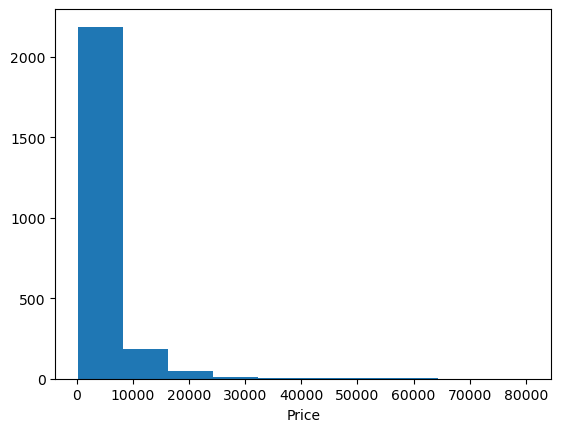

In [6]:
# Making a histogram of the price variable.
_ = plt.hist(df['Price'])
_ = plt.xlabel('Price')
plt.show()

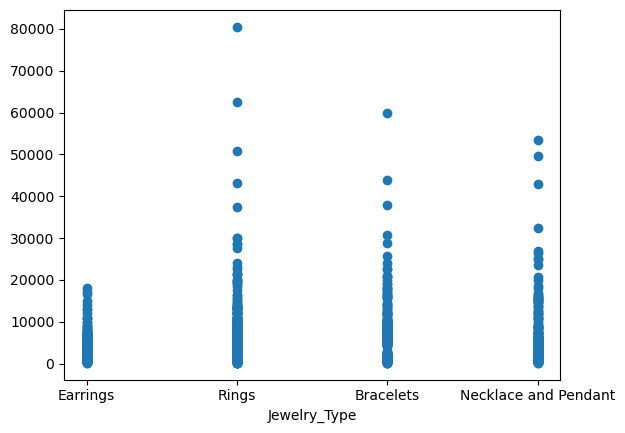

In [7]:
# Making a histogram of the price variable.
_ = plt.scatter(df['Jewelry_Type'], df['Price'])
_ = plt.xlabel('Jewelry_Type')
plt.show()

In [8]:
df_earrings = df[df['Jewelry_Type']=='Earrings']

In [9]:
df_earrings = df_earrings.drop(columns=['Stone4_Desc','Stone4_Carat',
       'Stone4_Stone', 'Stone4_Color', 'Stone4_Cut', 'Stone5_Desc',
       'Stone5_Carat', 'Stone5_Stone', 'Stone5_Color', 'Stone5_Cut',
       'Stone6_Desc', 'Stone6_Carat', 'Stone6_Stone', 'Stone6_Color',
       'Stone6_Cut'])

In [10]:
df_earrings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Description     413 non-null    object 
 1   Discount_Price  413 non-null    float64
 2   Price           413 non-null    float64
 3   Metal           413 non-null    object 
 4   Metal Color     413 non-null    object 
 5   Stones          413 non-null    object 
 6   Jewelry_Type    413 non-null    object 
 7   Product_Carat   413 non-null    float64
 8   Stone1_Desc     413 non-null    object 
 9   Stone1_Carat    413 non-null    float64
 10  Stone1_Stone    413 non-null    object 
 11  Stone1_Color    413 non-null    object 
 12  Stone1_Cut      413 non-null    object 
 13  Stone2_Desc     217 non-null    object 
 14  Stone2_Carat    217 non-null    float64
 15  Stone2_Stone    217 non-null    object 
 16  Stone2_Color    217 non-null    object 
 17  Stone2_Cut      217 non-null    obj

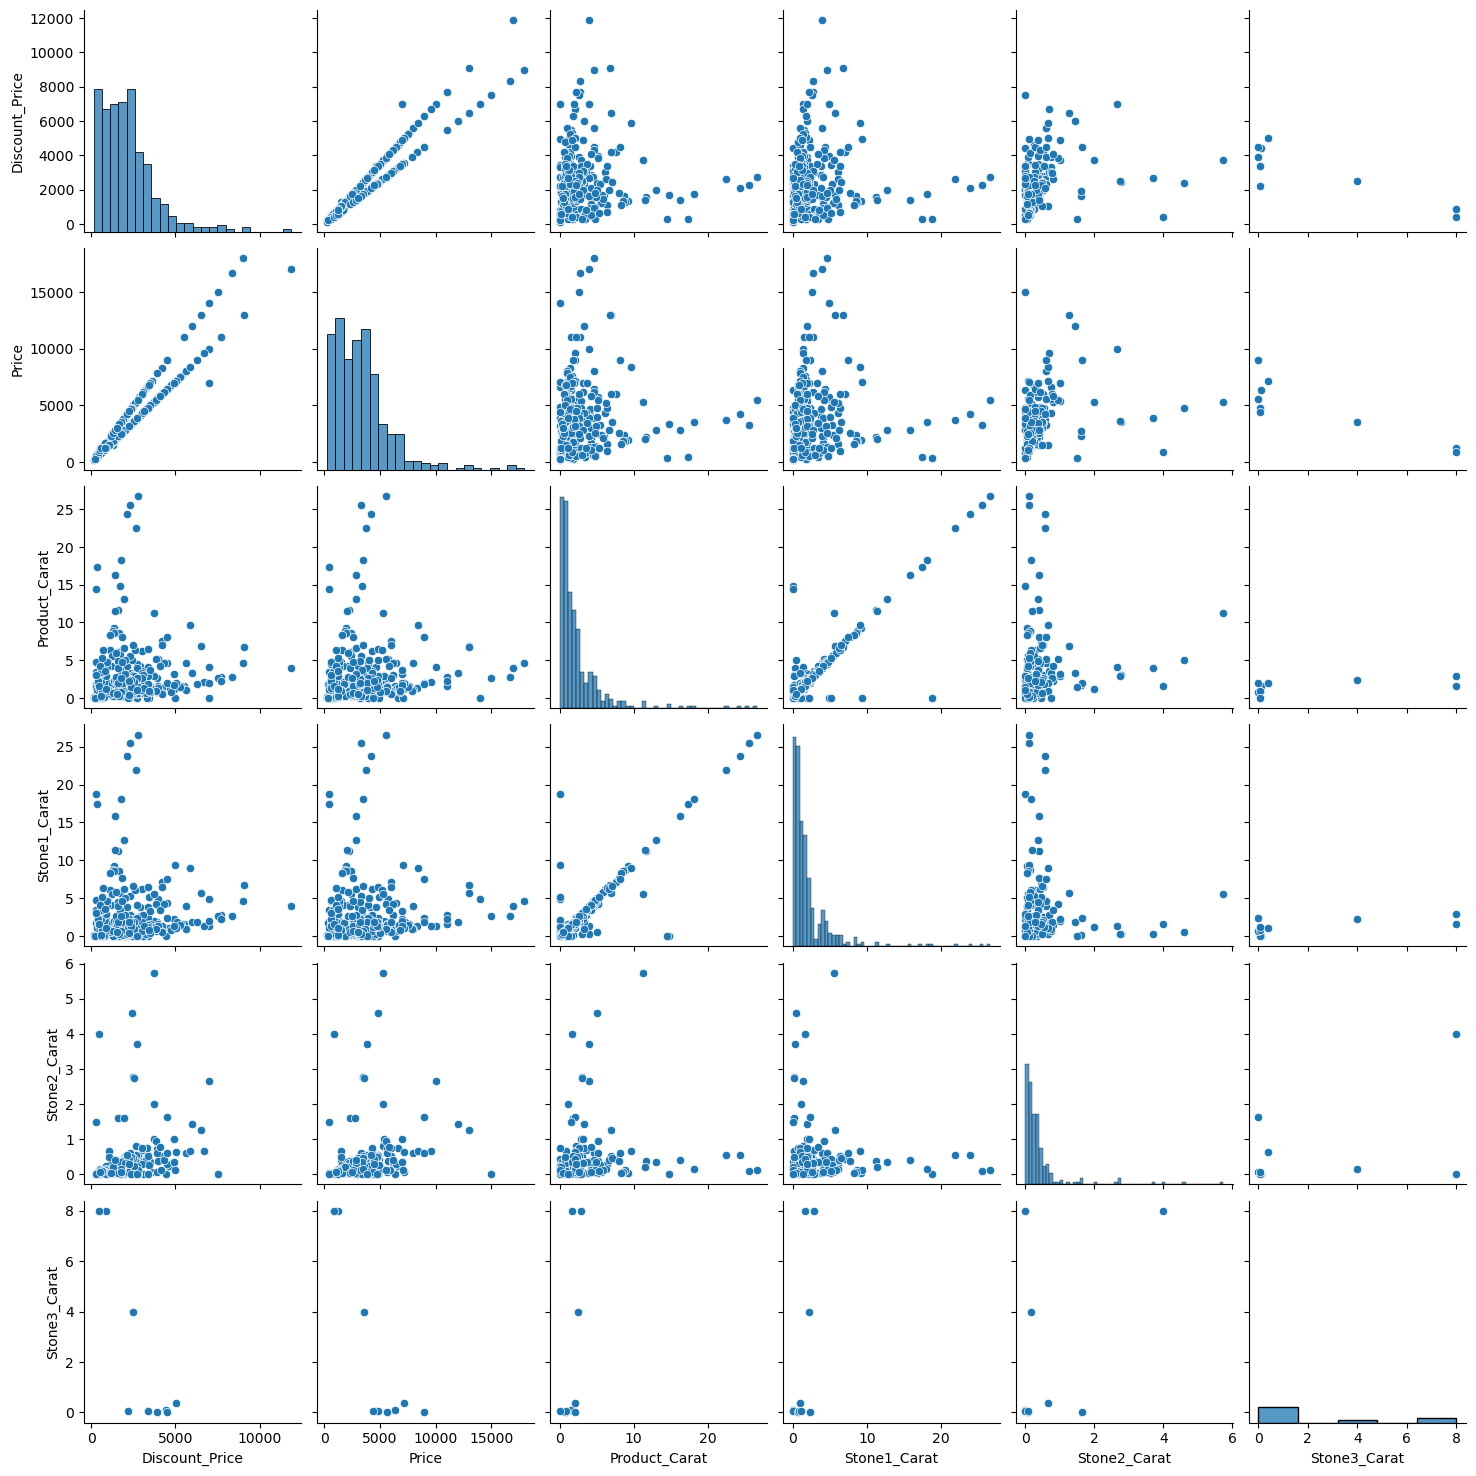

In [11]:
sns.pairplot(df_earrings)
plt.show()

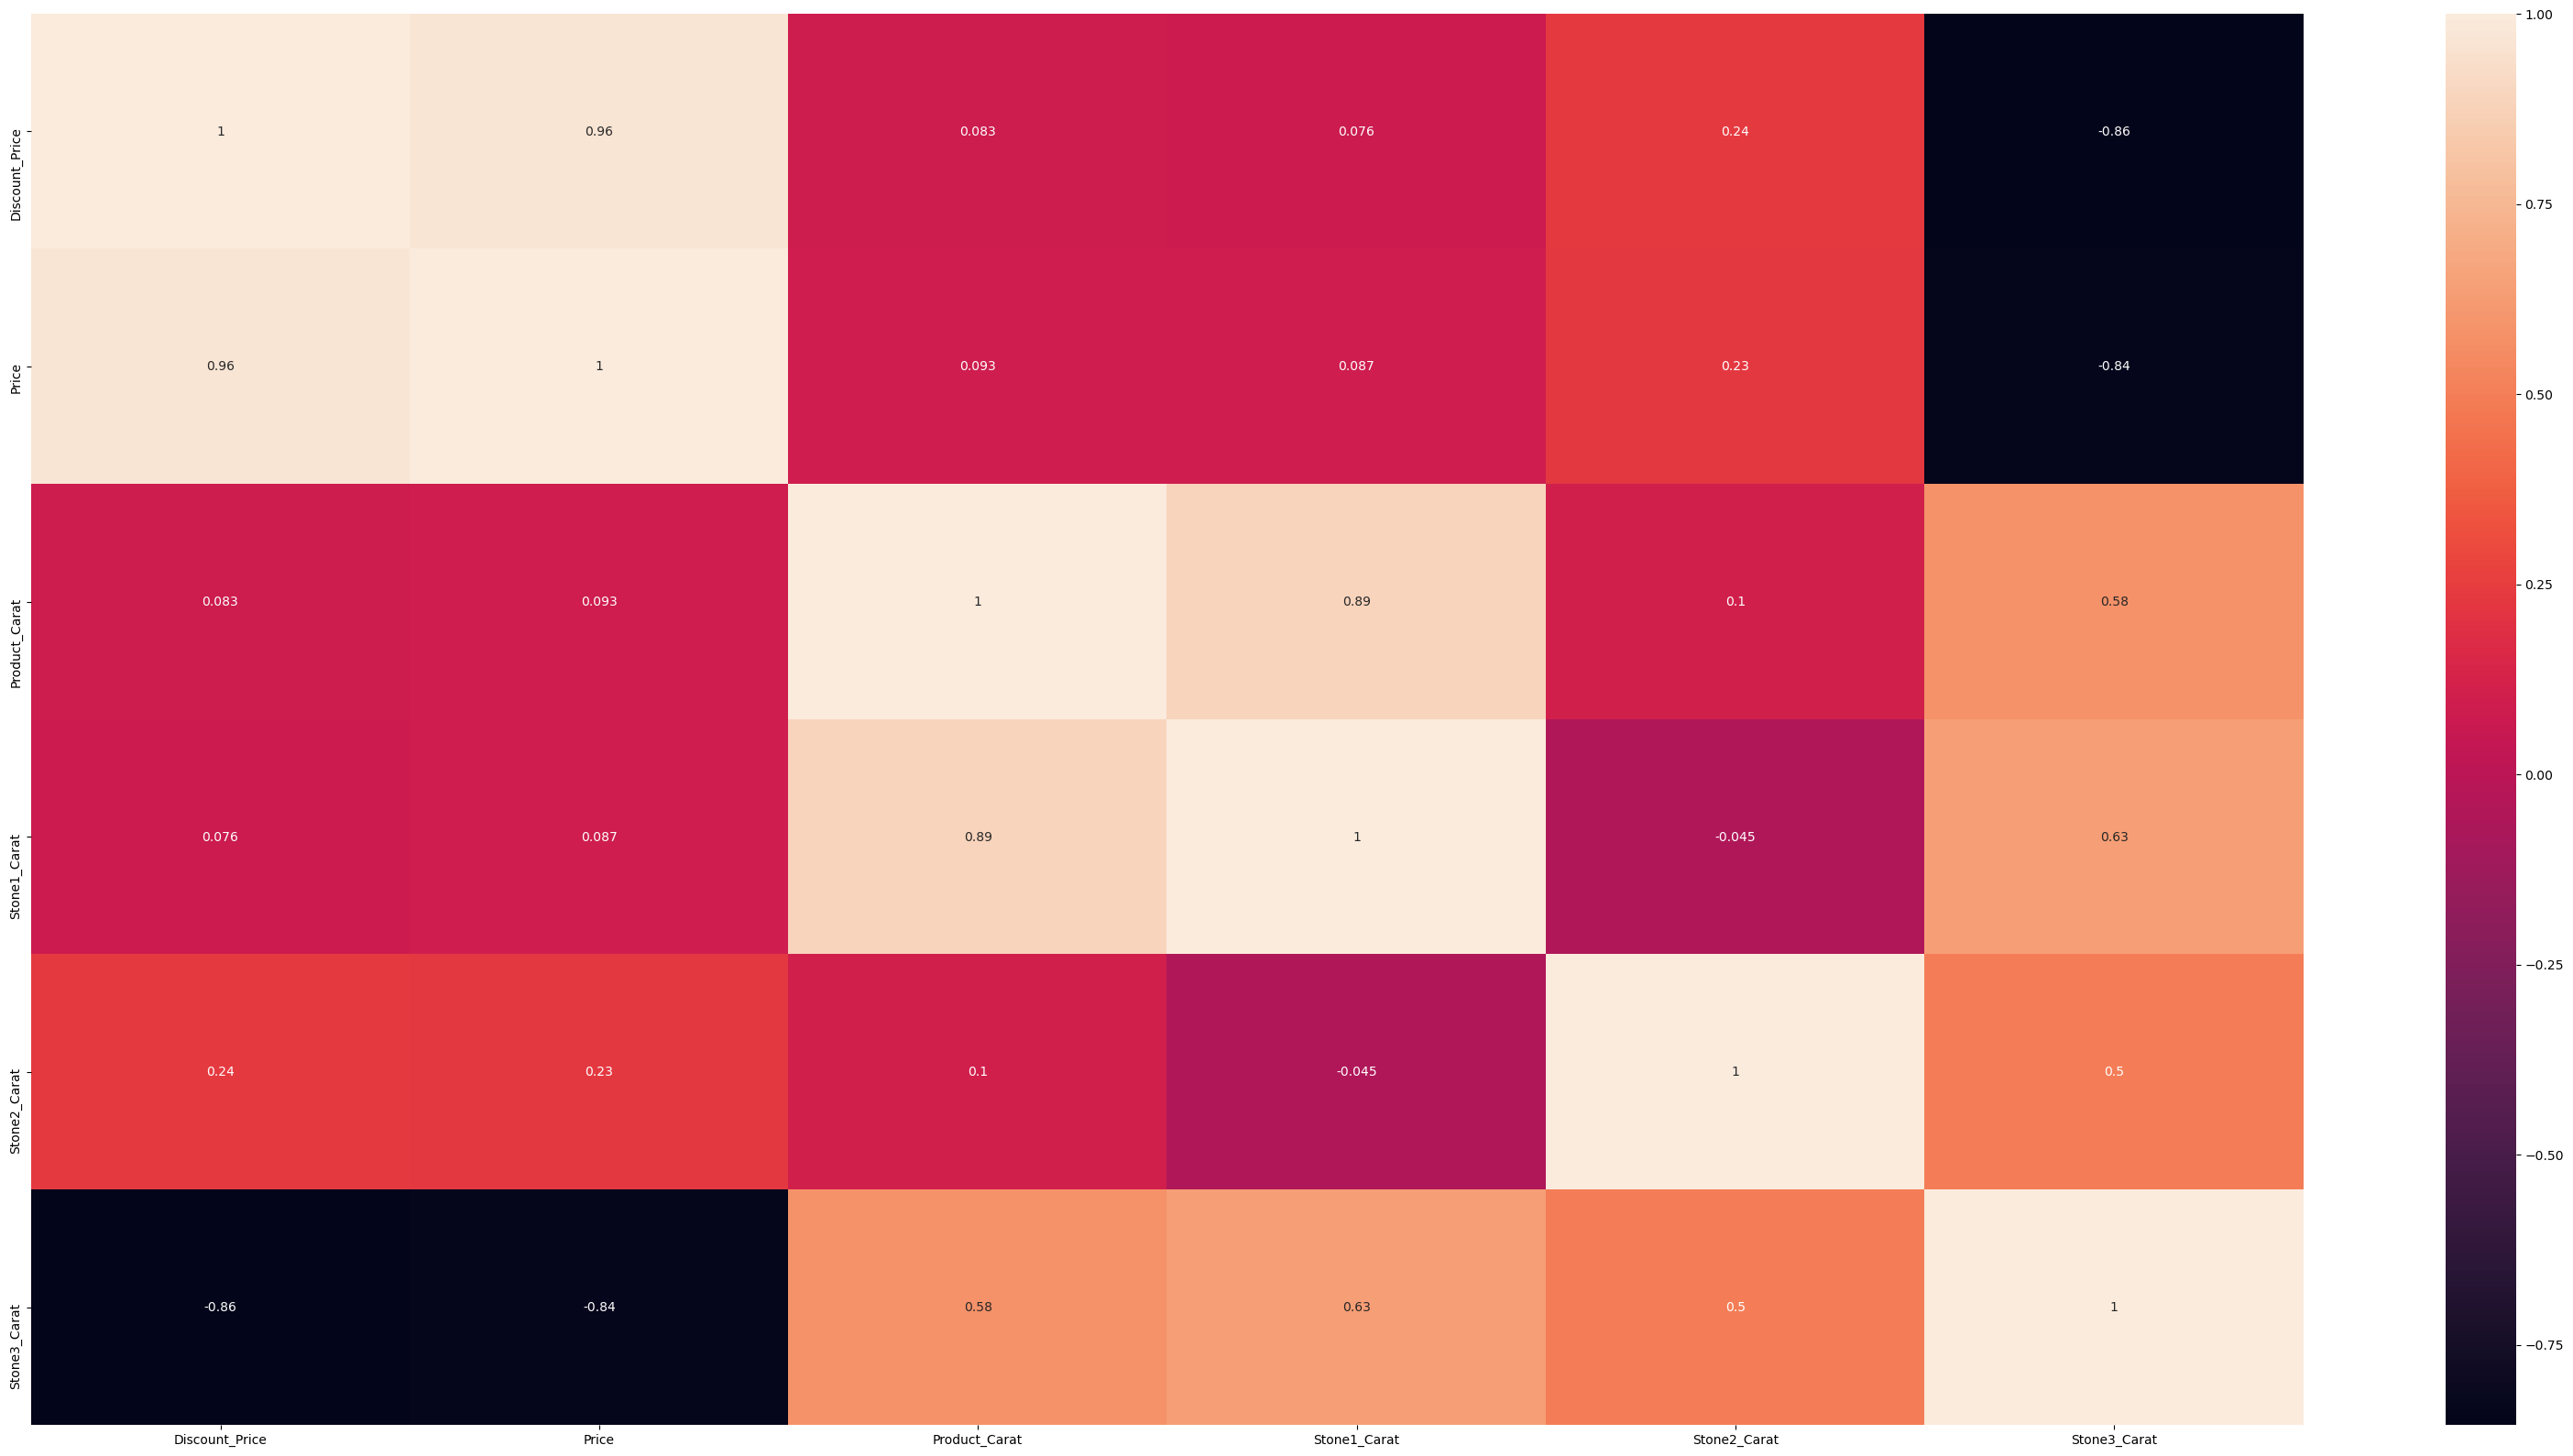

In [12]:
plt.figure(figsize=(40,20))
sns.heatmap(df_earrings.corr(), annot=True)
plt.show()

In [13]:
df['Metal'].unique()

array(['14K Gold', '18K Gold', 'Sterling Silver',
       'Sterling Silver & 18K Gold', 'Sterling Silver & 14K Gold',
       'Stainless Steel & 18K Gold', '14k Gold', 'Round Pearl'],
      dtype=object)

In [14]:
df['Metal'] = df['Metal'].str.replace('14k Gold','14K Gold')

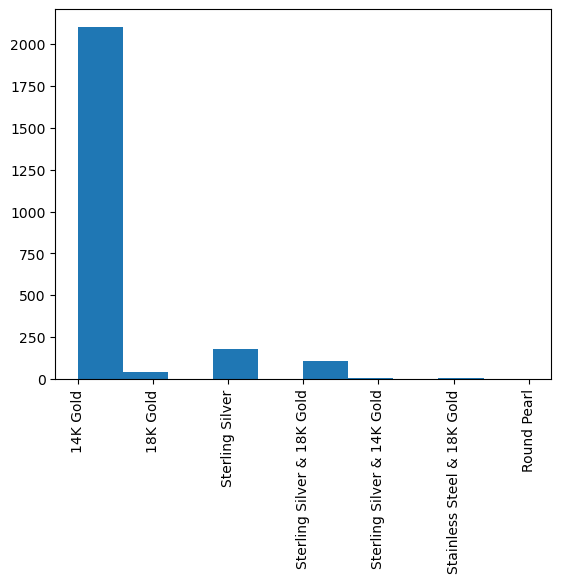

In [15]:
_ = plt.hist(df['Metal'])
plt.xticks(rotation=90)

plt.show()

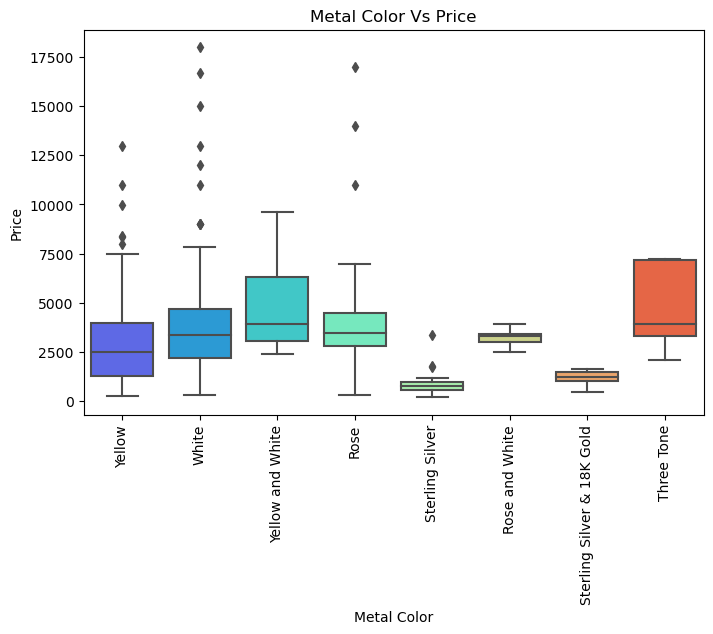

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Metal Color',y='Price',data=df_earrings, palette='rainbow')
plt.title("Metal Color Vs Price")
plt.xticks(rotation=90)
plt.show()

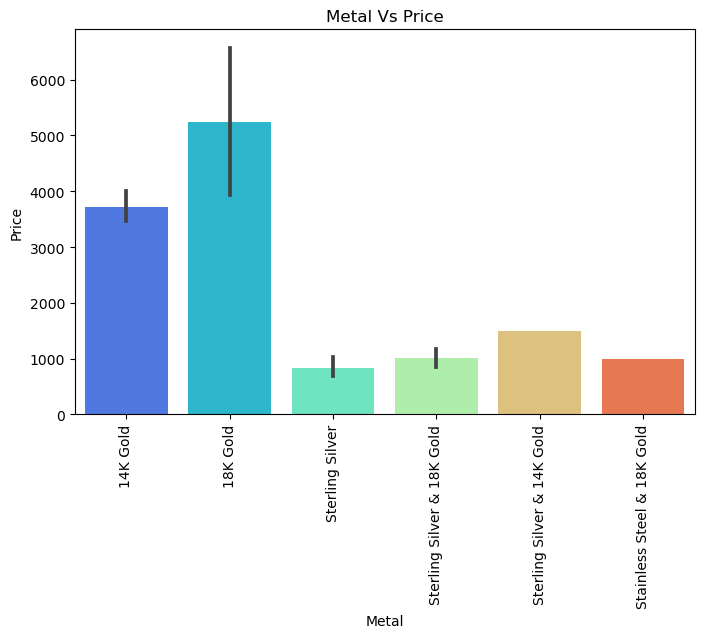

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='Metal',y='Price',data=df_earrings, palette='rainbow')
plt.title("Metal Vs Price")
plt.xticks(rotation=90)
plt.show()

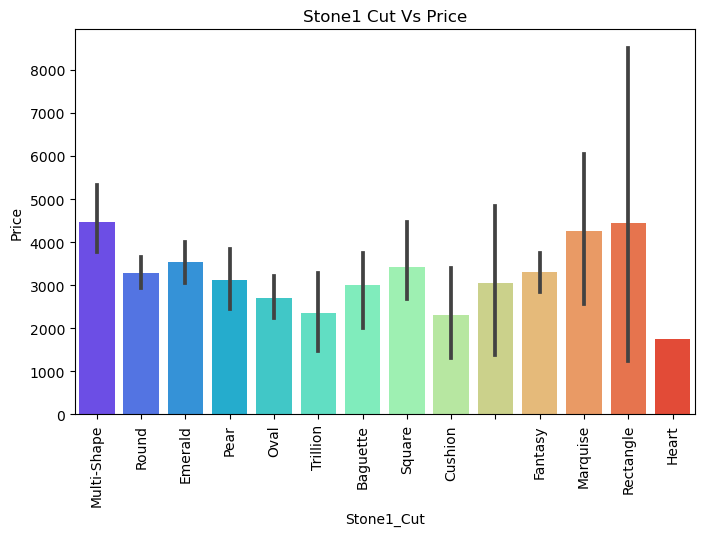

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Cut',y='Price',data=df_earrings, palette='rainbow')
plt.title("Stone1 Cut Vs Price")
plt.xticks(rotation=90)
plt.show()

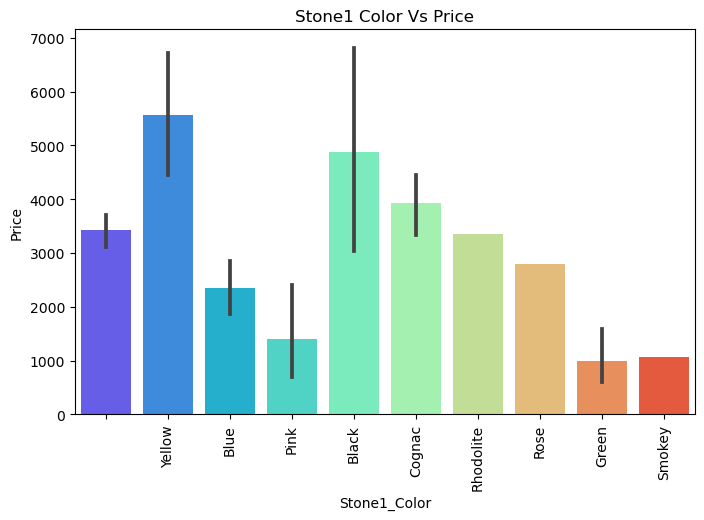

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Color',y='Price',data=df_earrings, palette='rainbow')
plt.title("Stone1 Color Vs Price")
plt.xticks(rotation=90)
plt.show()

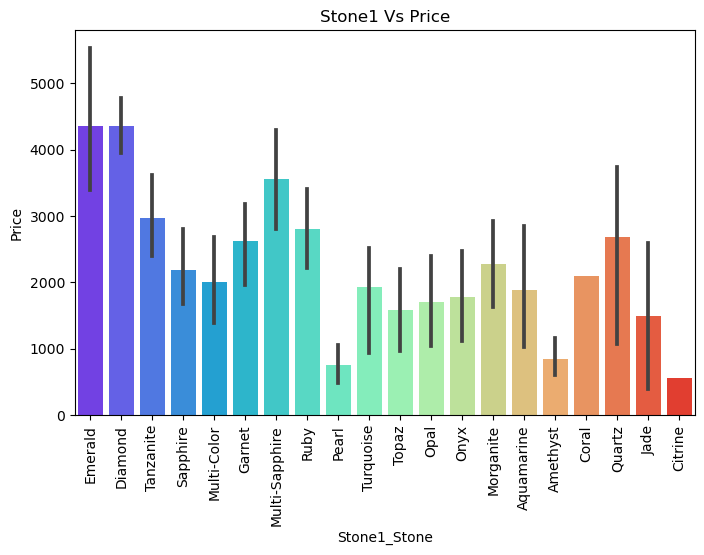

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Stone',y='Price',data=df_earrings,palette='rainbow')
plt.title("Stone1 Vs Price")
plt.xticks(rotation=90)
plt.show()

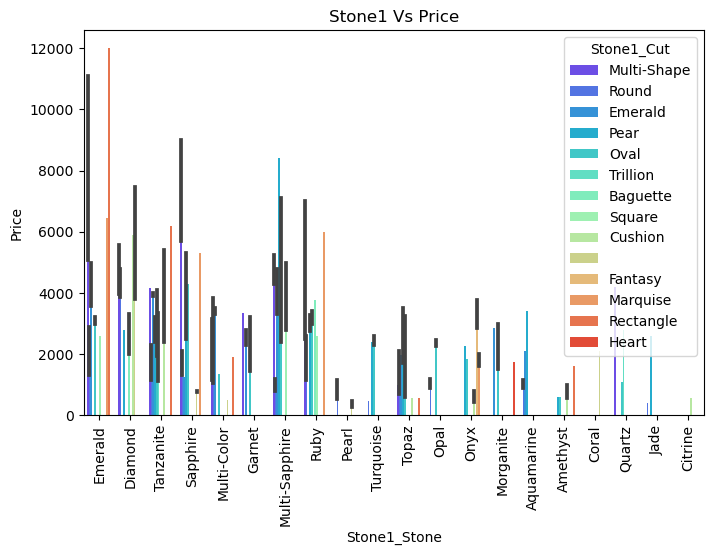

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stone1_Stone',y='Price',hue='Stone1_Cut',data=df_earrings,palette='rainbow')
plt.title("Stone1 Vs Price")
plt.xticks(rotation=90)
plt.show()